# Machine Learning : 
## Unsupervised Learning
## Creating Customer Segments

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project.

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, we explore the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [3]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [8]:
# TODO: Select three indices of your choice you wish to sample from the dataset
#indices = np.random.choice(range(0,441),3, replace=False)
indices = [75, 437, 103]
print 'Chosen indices = ', indices
# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen indices =  [75, 437, 103]
Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,20398,1137,3,4407,3,975
1,14531,15488,30243,437,14841,1867
2,56082,3504,8906,18028,1480,2498


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

> **Answer:**

> * Customer 0 bought predominantly fresh items, so this could be a **take-out cafe**, which doesn't need a lot of soap.
> * Customer 1 bought predominantly groceries and quite a lot of detergents and paper, so this must be a **retailer**.
> * Customer 2 bought a lot of fresh and frozen products, so this must likely be a **market/restaurant/cafe**.

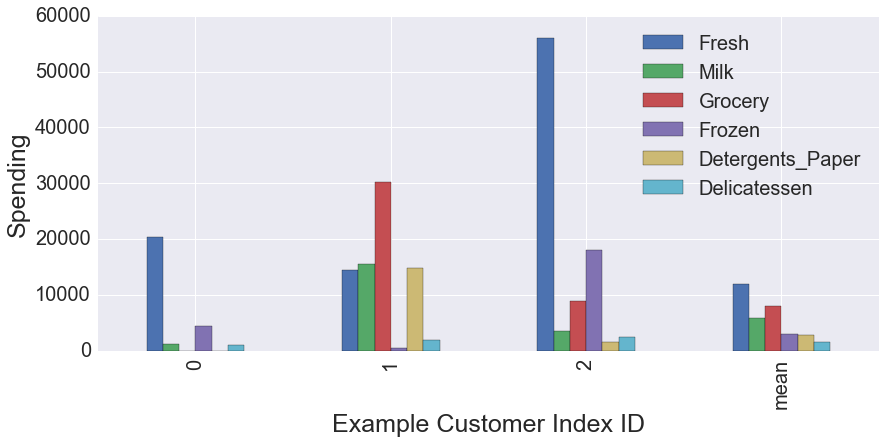

In [9]:
# Import Seaborn, a very powerful library for Data Visualisation
import seaborn as sns
sns.set(font_scale=2.) 
samples_bar = samples.append(data.describe().loc['mean'])
#samples_bar.index = indices + ['mean']
_ = samples_bar.plot(kind='bar', figsize=(14,6))
_.set_xlabel('Example Customer Index ID', fontsize=25)
_.set_ylabel('Spending', fontsize=25)


* Customer 0 has a spending on Fresh that is about 2x the mean. But has spending on Milk, Grocery, Detergents_Paper and Delicatessen that are less than the average. 
* Except for Frozen and Paper, Customer 1 spend above averange. The bulk of Customer 1's spending is on Groceries, which is about thrice as much as the mean.
* Customer 2's spending on Fresh items is about 5x the Fresh average, while on Frozen is about 6x the  Frozen average.

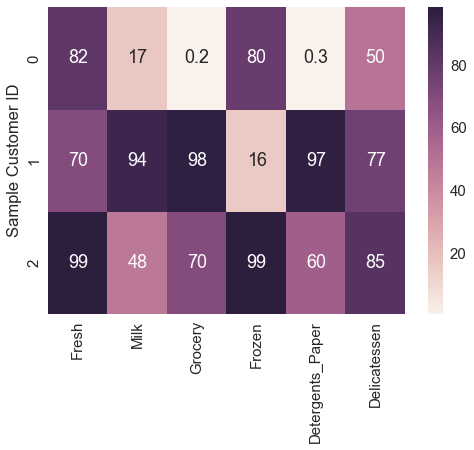

In [10]:
import seaborn as sns
sns.set(font_scale=1.5) 
# First, calculate the percentile ranks of the whole dataset.
percentiles = data.rank(pct=True)
# Then, round it up, and multiply by 100
percentiles = 100*percentiles.round(decimals=3)
# Select the indices you chose from the percentiles dataframe
percentiles = percentiles.iloc[indices]
# Now, create the heat map using the seaborn library
_ = sns.heatmap(percentiles, vmin=1, vmax=99, annot=True, yticklabels = ["0","1","2"])
_.set_ylabel('Sample Customer ID')

* Customer 0 spends more than 80% of the customers on Fresh and Milk, while just on the median on Delicatessen.
* Customer 1 ranks really high on Milk, Grocery and Detergents_Paper spending.
* Customer 2 is at the top 1% of customers in terms of spending on Fresh and Frozen, and at the top 15% of customer spending on Delicatessen.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [11]:
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor

# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature

new_data = data.drop(['Detergents_Paper'],  axis=1)
labels = data.Detergents_Paper

# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(new_data, labels, test_size = 0.25, random_state=143)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=143)
regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test) #Returns the coefficient of determination R^2 of the prediction.
print score

0.743597204816


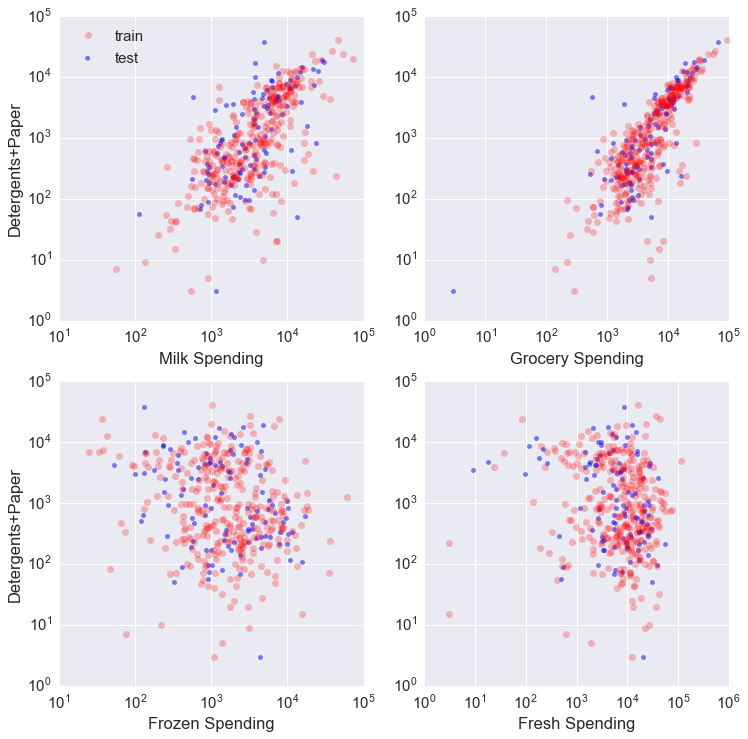

In [12]:
import matplotlib.pyplot as plt
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size


f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

fig1 = ax1.loglog(X_train['Milk'], y_train, 'ro', label="train", alpha=0.25)
ax1.scatter(X_test['Milk'], y_test, color='blue', label='test', alpha=0.5)
ax1.set_xlabel('Milk Spending')
ax1.set_ylabel('Detergents+Paper')
ax1.legend(loc='upper left')

fig2 = ax2.loglog(X_train['Grocery'], y_train, 'ro',  alpha=0.25)
ax2.scatter(X_test['Grocery'], y_test, color='blue',  alpha=0.5)
ax2.set_xlabel('Grocery Spending')


fig3 = ax3.loglog(X_train['Frozen'], y_train, 'ro', label="Frozen", alpha=0.25)
ax3.scatter(X_test['Frozen'], y_test, color='blue',  alpha=0.5)
ax3.set_xlabel('Frozen Spending')
ax3.set_ylabel('Detergents+Paper')

fig4 = ax4.loglog(X_train['Fresh'], y_train, 'ro', label="Fresh", alpha=0.25)
ax4.scatter(X_test['Fresh'], y_test, color='blue', alpha=0.5)
ax4.set_xlabel('Fresh Spending')


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

> **Answer:**

> Attempt was made on the "Detergents_Paper" feature, since by experience, I can also find them in grocery aisles and people who buy their groceries buy detergents and paper along with their groceries. 
Based on an $R \sim 0.74$, there is appears to be some degree of correlation between **Detergents_Paper** and the rest of the features. 

>In order to understand how the features relate, it would be useful to plot (some) pairs of them. We can visualize some pairs as shown in the plots above. The tightest correlation is between the **Detergents_Paper and Grocery Spending**, and that **Detergents_Paper and Milk** are also linearly correlated, albeit with a larger spread. **Detergents_Paper** does not seem to correlate with the annual spending on **Frozen, Fresh or Delicatessen** (though not shown here). The overall $R^2$ here is representative of the fact that only three of the five features show correlations. Although, an $R^2 \sim 0.74$ is unimpressive (compared to the many $R^2$'s I've seen), **Detergents_Paper** feature still strongly correlates with two features, and thus, is likely not necessary.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

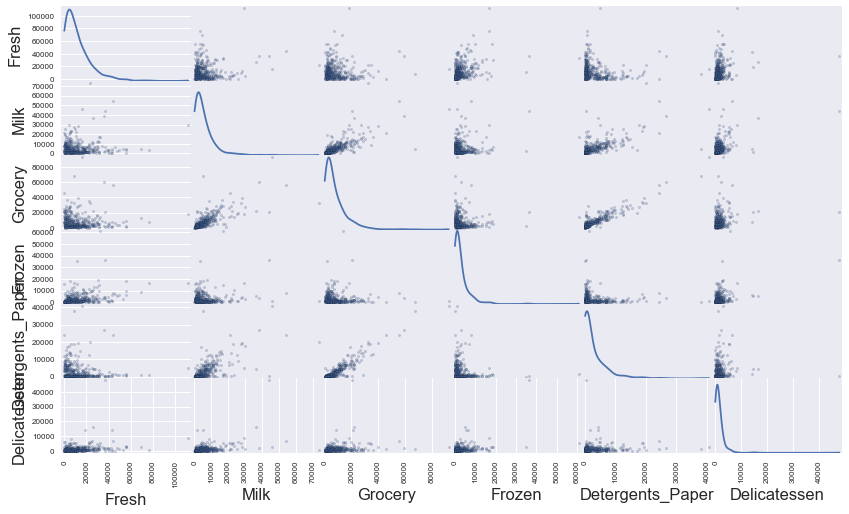

In [13]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

> **Answer:**

> As mentioned above, **Detergents_Paper** correlates both with **Grocery and Milk**. Additionally, **Grocery** correlates with **Milk**. The rest of the plots are not too useful since they just look like blobs of point near the origin. The plots I did for Q2 relates to this question. 
>I think it is safe to say that the distributions for all features are asymmetric, and hence, non-normal. They look more like a Poisson distribution to me, with a peak towards the left edge of the plot, at smaller x-values (i.e a positive skew).

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

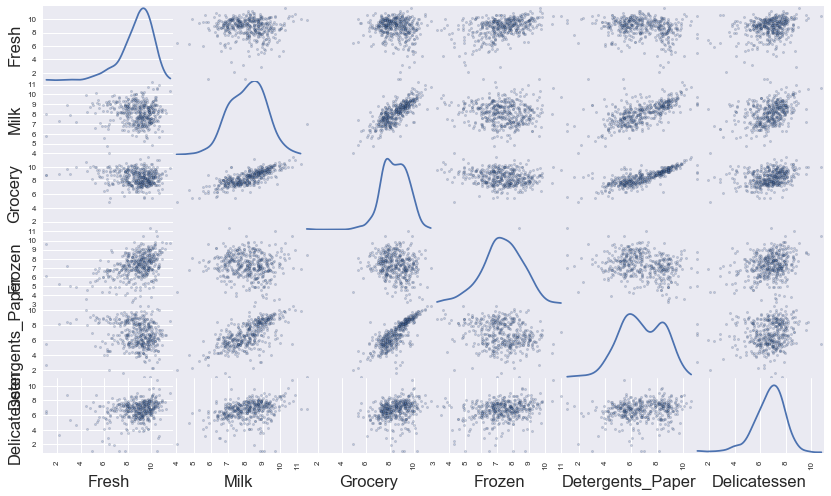

In [14]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [15]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
1,9.584040,9.647821,10.317020,6.079933,9.605149,7.532088
2,10.934570,8.161660,9.094480,9.799681,7.299797,7.823246


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


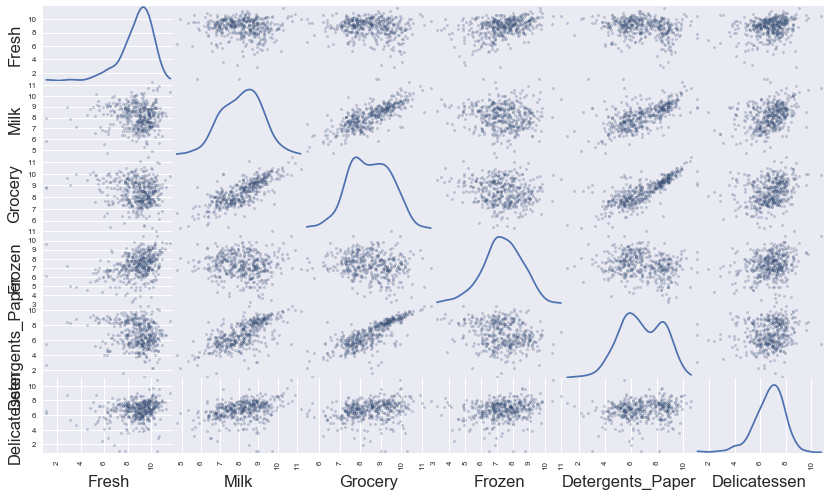

In [16]:
# For each feature find the data points with extreme high or low values
outliers  = []
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3-Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    outliers = list(outliers + log_data[~((log_data[feature] >= Q1 - step) & \
                                              (log_data[feature] <= Q3 + step))].index.tolist())

    # OPTIONAL: Select the indices for data points you wish to remove
from collections import Counter
counts = Counter(outliers)
outliers = sorted([value for value, count in counts.items() if count > 1])

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
pd.scatter_matrix(good_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

> **Answer:**

> Yes: **[65, 66, 75, 128, 154]**. 
> Whether or not an outlier be removed depends upon the goals of the study. One needs to be careful in removing these "outliers", since it means removing about 10% of the data. But if one needs to find general trends/patters of customer behavior such as in regression analysis, for the purpose of predicting future customer needs, one might need to remove outliers, for a better, more robust fit. Also, if one needs to compute statistical quantities that are not robust to outliers such as the mean, then not taking care of outliers is a dangerous thing.

> But, outliers can be useful too. Quite a lot of discoveries in physics and [astronomy](https://project.lsst.org/meetings/ahm2012/Breakout/Thursday/KirkBorne-LSST-Informatics.pdf) are because of due diligence in understanding outliers in data. In this context, outliers can also be useful in understanding customer behaviour. For instance, knowing who spends the most among your customers, and which products may help you strategize.

>An Addendum: Indeed in this case, removing *only* 5 outliers (~1%), which are in fact 'repeat offenders', would be a good trade. 


## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

Dimension 1    0.4430
Dimension 2    0.7068
Dimension 3    0.8299
Dimension 4    0.9311
Dimension 5    0.9796
Dimension 6    1.0000
Name: Explained Variance, dtype: float64


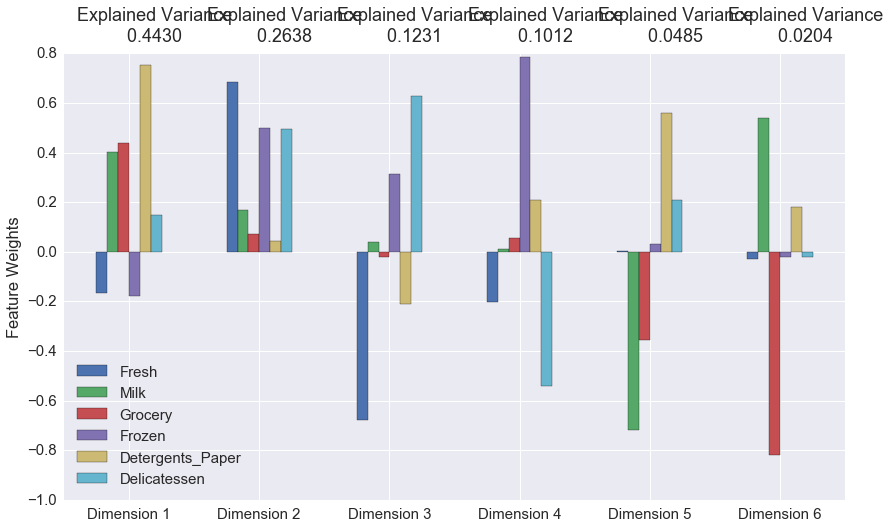

In [17]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=len(good_data.keys()))
pca.fit(good_data)
# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)
print pca_results['Explained Variance'].cumsum()

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

> About 70.68% of the variation in the data is explained by the first and second components. The first four components explain 93.1%.

> * **First Component [Explained Variance Ratio = 44.30%]** - Milk, Grocery, Detergents_Paper and Delicatessen are positively correlated with the first PCA component, the strongest of which comes from Detergents_Paper, of about **0.8**. Based on the relative correlation strengths, an increase in Detergents_Paper will both result in an increase in the first component, and a strong increase in Milk and Grocery spending, and a slight increase in Delicatessen. On the other hand, Frozen and Fresh are weakly anti-correlated with the first component, and the four other features. A (slight) decrease in these will mean an (slight) increase in the PCA component. A strong increase in the four Milk, Grocery, Detergents_Paper and Delicatessen will cause a slight increase in Fresh and Frozen.

> * **Second Component [Explained Variance Ratio = 26.38%]** - The second component is positively correlated with the *ALL* original features, with Fresh, Frozen, and Delicatessen showing relatively strong correlations of $>$0.5. Grocery, Detergents_Paper and Milk are very weakly correlated ($< 0.2$) to this component. Customers who spent on Fresh are likely to spend on Frozen and Delicatessen, given the relative strengths of the correlations.

> * **Third Component [Explained Variance Ratio = 12.31%]** - This component is strongly ($>0.5$) correlated with Delicatessen and strongly anti-correlated with Fresh ($< - 0.5$). Milk and Frozen are weakly correlated. Detergents_Paper is weakly anti correlated, while Grocery shows almost no correlation at all. Customers who spent on fresh may have spent to a small degree on Detergents_Paper, and to a much smaller degree on grocery.

> * **Fourth Component [Explained Variance ratio = 10.12%]** - Frozen is very strongly correlated with this dimension, at $\approx 0.8$. Delicatessen shows a strong anti-correlation. Milk and Grocery show a very weak, almost zero correlation with this dimension.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [18]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-8.3026,0.4747,0.9774,-1.1195,0.2977,4.3514
1,3.7425,0.8561,-0.9885,-0.8879,-0.0503,-0.2058
2,0.0326,3.3554,-0.0963,1.0296,0.3539,-0.5474


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [19]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)
# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [20]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-8.3026,0.4747
1,3.7425,0.8561
2,0.0326,3.3554


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

> **Answer:**
> * **[K-means Clustering](http://www.improvedoutcomes.com/docs/WebSiteDocs/Clustering/K-Means_Clustering_Overview.htm)** - It is simple, and fast(linear in the number of data points). Works, especially well for globular clusters. Although one of the fastest clustering algorithms available, it becomes problematic to local minima.
> * **[Gaussian Mixture Model (GMM) Clustering](http://sites.stat.psu.edu/~jiali/course/stat597e/notes2/mix.pdf)** - an extension of the K-means model, where we model the clusters with a Gaussian, so we have both the mean and the covariance of the clusters. It works well for data that are non-spheroidal. It is computed using statistical inference (i.e. probabilistic cluster modelling), and the parameters are computed by maximizing the likelihood, so it gives a quantitative measure to one degree of belief.

> Because I am not seeing clearly separate spheroidal clusters, and I am not sure if there are even clusters, I would rather try to look at the clustering in a probabilistic sense. I prefer to use **GMM** in trying to find clusters.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [21]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.mixture import GMM
for n in range(2, 11):
    clusterer = GMM(n_components = n, random_state=143)
    clusterer.fit(reduced_data)
    # TODO: Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)
    
    # TODO: Find the cluster centers
    centers = clusterer.means_
    
    # TODO: Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)
    
    # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    from sklearn.metrics import silhouette_score
    score = silhouette_score(reduced_data, preds)
    print "For {} clusters we get a silhouette coefficient of {:0.3f}".format(n, score)

For 2 clusters we get a silhouette coefficient of 0.412
For 3 clusters we get a silhouette coefficient of 0.372
For 4 clusters we get a silhouette coefficient of 0.333
For 5 clusters we get a silhouette coefficient of 0.295
For 6 clusters we get a silhouette coefficient of 0.275
For 7 clusters we get a silhouette coefficient of 0.322
For 8 clusters we get a silhouette coefficient of 0.305
For 9 clusters we get a silhouette coefficient of 0.271
For 10 clusters we get a silhouette coefficient of 0.330


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**
> As can be seen above, the silhoutte scores vary from 0.27 to a highest score of 0.41. The best score is gound using a cluster of **TWO** members at 0.412.


### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

In [22]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.mixture import GMM
clusterer = GMM(n_components = 2, random_state=143)
clusterer.fit(reduced_data)
# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

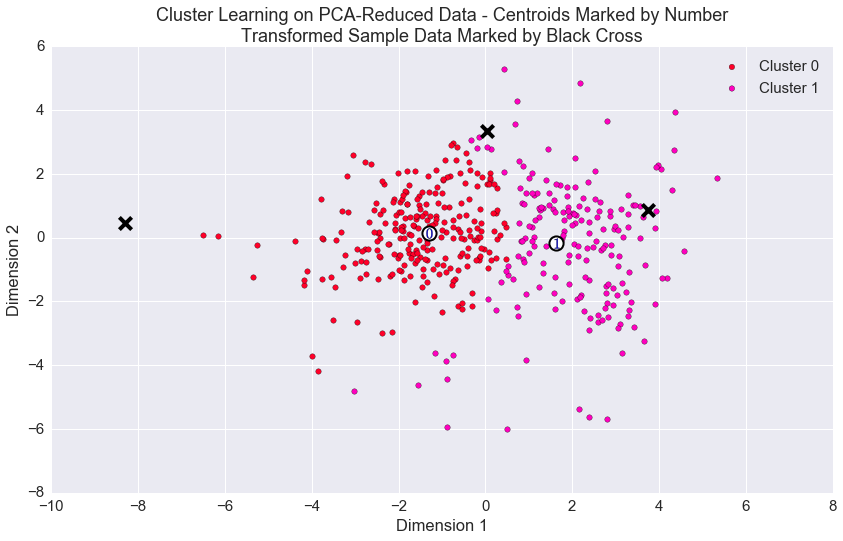

In [28]:
# Display the results of the clustering from implementation

rs.cluster_results(reduced_data, preds, centers, pca_samples)
plt.savefig('CustomerSegmentsClustering.png', dpi=400)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [24]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8812.0,2052.0,2689.0,2058.0,337.0,712.0
Segment 1,4316.0,6347.0,9555.0,1036.0,3046.0,945.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

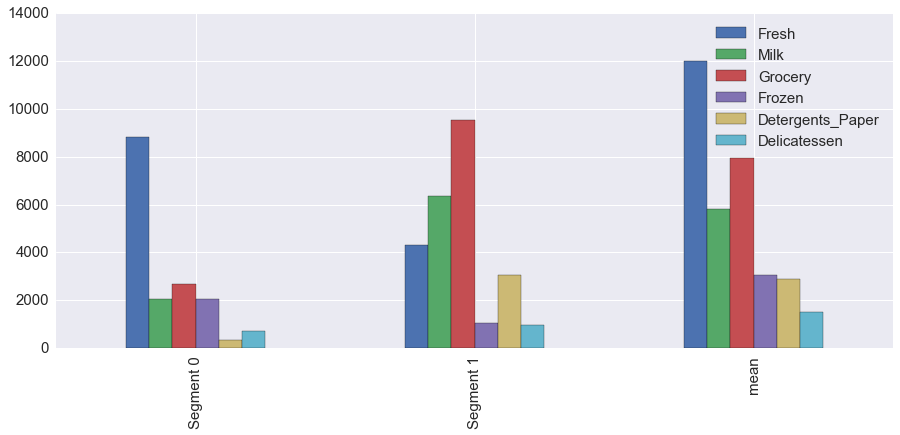

In [25]:
import seaborn as sns
true_centers = true_centers.append(data.describe().loc['mean'])
_ = true_centers.plot(kind='bar', figsize=(15,6))

**Answer:**
> **Segment 1** could represent **one-stop-shop grocery+retailer** kinds of customer needs like that for a typical household, spending mostly on groceries than fresh items, and cleaning materials. It seems that the average annual spending would represent a typical household.

> **Segment 0** represents more like those customer with **fresh-market-ingredient-needs** where fresh ingredients like fruits, veggies, meat, and the like, typical for people with food businesses, and very little on groceries, and detergents and paper.

*Addendum:*
>The bar plots above indicate:

> **Segment 1**'s distribution appears to have a similar shape relative to the average, with **Fresh, Milk and Grocery** dominating the spending list. However, a customer at this cluster's center spend more on Groceries and Detergents_Paper than the average. To me this makes sense for a typical household.

> **Segment 0**'s shopping list is largely dominated by Fresh items. The fraction spent on other categories pale in comparison the fraction spen on Fresh items. This is atypical of a household, but makes sense for someone who owns a food business.


### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

In [26]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1


**Answer:**

>  Sample 0 is predicted to be in cluster 0. Samples 1-2 are predicted in cluster 1. 

> I predicted segment 0 to like a fresh market-type of customers and Sample 1 has waayy more spending on fresh items than any of the other categories. 

> Sample 1 is a typical shopper at a typical retailer-grocery store. But I am surprised for Sample point 2, which is spending way more on fresh, relative to the other items. I thought Customer 2 should be in cluster 0, but this is only based on the fresh feature. But looking at the plots above, this customer happens to be at the boundary of the two clusters, so the confusion is understandable.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would reach positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

> **Answer:**

    > A/B tests splits the data into two groups (one for testing and the other as a control group) to test a hypothesis. In this context, the existing delivery service is applied to the control/null group, while the proposed changes will be applied to those customers in the test group. 
<br><br>
    Clustering has already shown us that that there two types of customers, having different needs: Segment 1 cares for fresh ingredients more (and more frequently) than the other. If the distributor will only want to make this change *for customers who react positively*, it makes sense to do A/B testing on **Segment 0** only. I would divide Segment 0 randomly into two approximately equal sub-groups, randomly assign which one is the control/null, and the other the test, and run an A/B test, and see if there is a significant difference exists in the revenues coming from the two sub-groups of Segment 0.
    

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

> Absolutely. In clustering customer types, we are essentially classifying. Now that we have clusters, we can attribute the **cluster/customer segment each customer is inferred to belong to as a LABEL** for that customer, a feature we can add to the dataset. Here we can easily train a supervised learner given the 440 customers, with the label/customer segment as the target variable (either with or without the outliers, but this is detail). Knowing only the predicted total spending is all we need to predict a label for **new** customers, and determine the appropriate delivery service for them.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

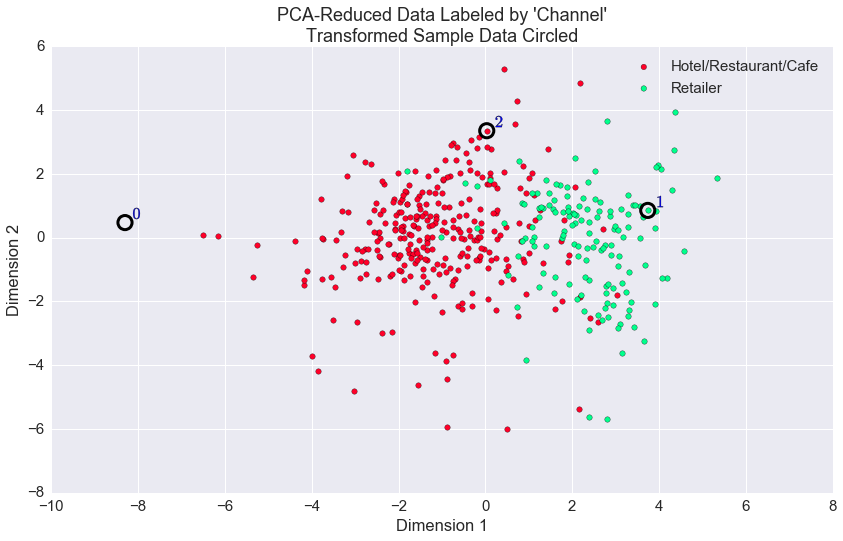

In [27]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

>**Answer:**

>*I wished the color scheme should have been RED instead of green for Retailers and PINK instead of red for Hotels/Restaurants/Cafes* to match the previous cluster plot.*

> Some points have been misclassified, especially those points near the boundary. Some points are also hard to classify since they mimic the needs for those in restaurants/cafes, but are in fact of the retailer type. Farther to the left or right edge of the plot, it is apparent that the clusters become more pure, so that a customer is either one or the other.

>I have chosen two clusters, based on the scores, and this happens to be consistent woth the underlying distribution of the data. A clear picture of why one customer type cares more for fresh ingredients than the other emerges: Hotels/Restarants and Cafes need their ingredients to be fresh daily, while the "retailers" would mean like a typical household. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.